<a href="https://colab.research.google.com/github/Bbrnn/engage_datascience_ai_ml/blob/main/Supervised_Simple_LinearRegression__ML_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import relevant Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading data
data=pd.read_excel("/content/drive/MyDrive/ENGAGE/Datasets/DataPreprocessing/child_health_data_bungoma_county_cleaned_data1.xlsx")

In [5]:
data.head(10)

,Age (months),Sex,Mother's education,Area,Wealth index quintile,Child's length or height (centimetres),Child's weight (kilograms),Body Mass Index WHO
0,45,0,1,0,3,102.4,16.2,15.45
1,45,1,0,0,4,92.5,13.5,15.78
2,36,1,0,0,0,88.5,13.4,17.11
3,51,0,0,0,0,101.3,15.0,14.62
4,56,0,0,0,0,105.0,15.2,13.79
5,20,0,0,0,0,84.5,9.9,13.87
6,4,0,0,0,0,70.4,7.1,14.33
7,27,1,0,0,3,89.5,13.8,17.23
8,39,1,0,0,2,89.5,12.7,15.85
9,18,0,0,0,2,73.9,8.2,15.01


In [6]:
data.isnull().sum()

,0
Age (months),0
Sex,0
Mother's education,0
Area,0
Wealth index quintile,0
Child's length or height (centimetres),0
Child's weight (kilograms),0
Body Mass Index WHO,0


In [7]:
data.shape


(768, 8)

We can get a feel of how our two variables are related by creating a scatter plot as shown below. From the diagram we can see that our variables exibit a linear relationship.

In [8]:
# Scatter plot
#data.plot(kind='scatter', x="Age (months)", y="Child's length or height (centimetres)", s=32, alpha=.8) # Changed y-axis column name to 'Height (cm)'
#plt.gca().spines[['top', 'right']].set_visible(False)

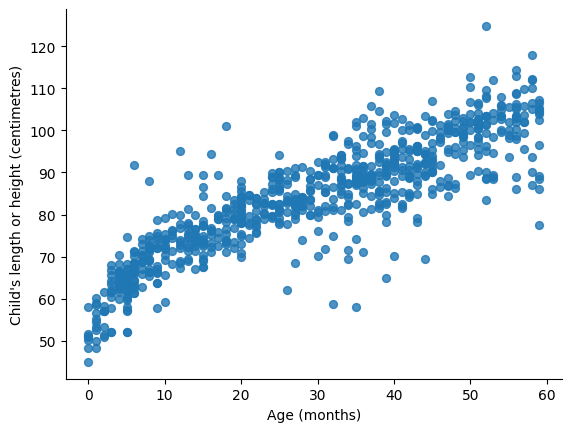

In [9]:
#SCATTER PLOT
data.plot(kind='scatter', x="Age (months)", y="Child's length or height (centimetres)", s=32, alpha=.8) # Corrected y-axis column name to 'BMI'
plt.gca().spines[['top', 'right']].set_visible(False)

We can extract our indepedent (x variable) and the depedent(y variable) from our dataset. In this case our x variable will be the column for Age and the y variable will be the column for height.

In [10]:
#Creating x and y values: X being the indepedent variable and y being the dependant variable

x=data[["Age (months)"]]
y=data[["Child's length or height (centimetres)"]]

After creating our x and y values, we can now create the model using the function LinearRegression contained in the linear_model class as shown below.

In [11]:
#creating the model
model=linear_model.LinearRegression()

In [12]:
#splitting the data into 70% training and 30% testing
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [13]:
print(x_train.shape)
print(y_train.shape)

(537, 1)
(537, 1)


In [14]:
print(x_test.shape)
print(y_test.shape)

(231, 1)
(231, 1)


In [15]:
#training the model

model.fit(x_train,y_train)

LinearRegression()

Once the model is trained, we can now use it to predict the data it has not seen saved in the x_test variable using the predict() function

In [16]:
y_pred=model.predict(x_test)

After getting the predicted values, we can compare it with the actual values saved in the y_test. We can do that by ploting the lines that show the predicted values and the actual values using the matplotlib library as shown below

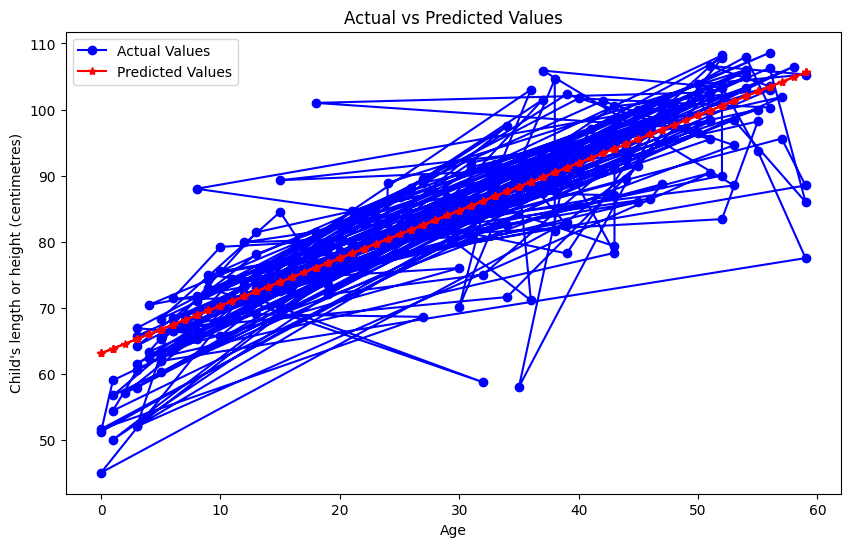

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(x_test, y_pred, label='Predicted Values', color='red', marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel("Child's length or height (centimetres)")
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()


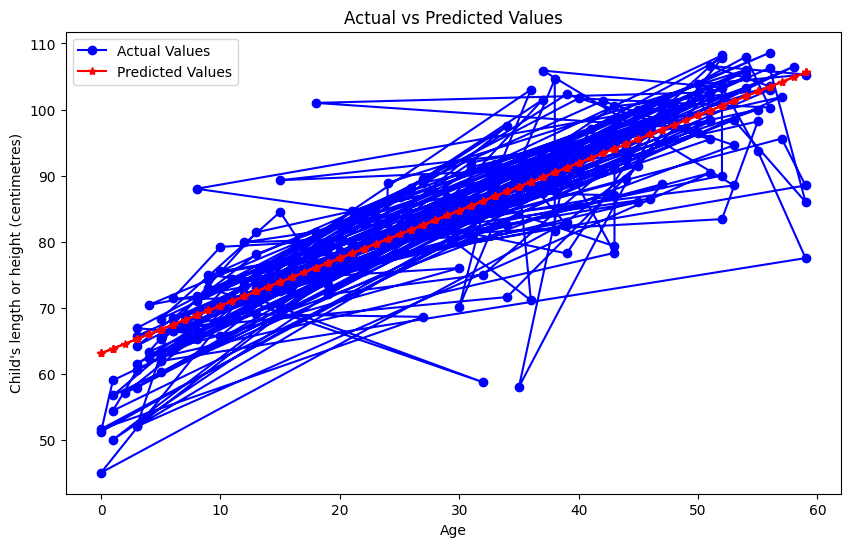

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(x_test, y_pred, label='Predicted Values', color='red', marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel("Child's length or height (centimetres)")
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean squared error")
print(mean_squared_error(y_test,y_pred))
print("R_squared")
print(r2_score(y_test,y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred))
print("Root Mean squared error")
print(mean_squared_error(y_test, y_pred,squared=False))

Mean squared error
53.6345129915852
R_squared
0.7320082015644302
Mean absolute error
5.040136882540832
Root Mean squared error
7.323558765489985


The red line indicates the predicted values while the blue lines indicate the actual values. As we can see from the graph it seems our model did not fit all the values correctly.

From the model, we can also get the value of the intercept and the value of the slop(coefficient)

In [22]:
model.intercept_

array([63.07908952])

The intercept from the model is 63.07908952 which means when the age is equal to 0, the weight is 63.07908952cm.

In [23]:
model.coef_

array([[0.72089993]])

The coefficient means that if the Age increases by 1 the height increases by 0.72089993

We can now use the created model to predict the height of of a new baby, lets say for a baby who is 12 months old. We will use the predict() function provided by sklearn as follows

In [24]:
predicted_Height= model.predict([[12]])
print(predicted_Height)

[[71.7298887]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
predicted_Height= model.predict([[47]])
print(predicted_Height)

[[96.96138631]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
predicted_Height= model.predict([[70]])
print(predicted_Height)

[[113.54208474]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can see from the value the predicted model displayed, a child who is 12 months old will approximetely weigh 71.7298887 cm. We can use this model to be able to estimate the height a child should be having at certain age, major deviation from the predicted values might be an indication of taller or shorter than expected height.

We now evaluate the linear regression using r_squared, mean absolute error, mean squared error, root mean squared error. In order to do that we have to import the functions from sklearn.metrics and then use them to evaluate the performance of our algorithm as shown below.

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean squared error")
print(mean_squared_error(y_test,y_pred))
print("R_squared")
print(r2_score(y_test,y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred))
print("Root Mean squared error")
print(mean_squared_error(y_test, y_pred,squared=False))

Mean squared error
53.6345129915852
R_squared
0.7320082015644302
Mean absolute error
5.040136882540832
Root Mean squared error
7.323558765489985


Model result interpretatition
From the metrics result, we can see our model is okay but with a good fit as the r_squared is low at 0.73. This means that the our predictor variable weight only explains 73% of the variation in the in the childs weight. The other 27% variation is explained by other factors not included in our data. This means that age alone can predict the weight of a person but might need additional variables to improve the performance.

The mean absolute error of 5.04 shows that on average the predictions made by our linear regression model differ from the actual values by approximately 5.04cm. This means that if the actual weight of a person is of a child is 70 the model will predict it to be 75.04 or 64.96

The mean squared error of 53.63 shows that our algorithm squared error between the actual value and the predicted value is 53.63. Because the mean squared error squares the errors, it is more sensitive to the outliers, therefore higher values indicate the presence of outliers in our data. In this case our value is high meaning we could be having outliers in our model.

An RMSE of 7.32 in predicting weight based on age suggests that the predictions made by our model are, on average, about 7.32 height units away from the actual height values.

**Save the model for later deployment and usage**

In [30]:
import joblib
joblib_file = "/content/drive/My Drive/ENGAGE/Datasets/SimpleLinearRegressionPractical/simple_linear_regression_model_practical10.joblib"
joblib.dump(model, joblib_file)

['/content/drive/My Drive/ENGAGE/Datasets/SimpleLinearRegressionPractical/simple_linear_regression_model_practical10.joblib']